In [6]:
from __future__ import print_function

import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

batch_size = 128
num_classes = 10
epochs = 20

In [7]:
# the data, shuffled and split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
f = np.load("mnist.npz")
x_train, y_train = f['x_train'], f['y_train']
x_test, y_test = f['x_test'], f['y_test']

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


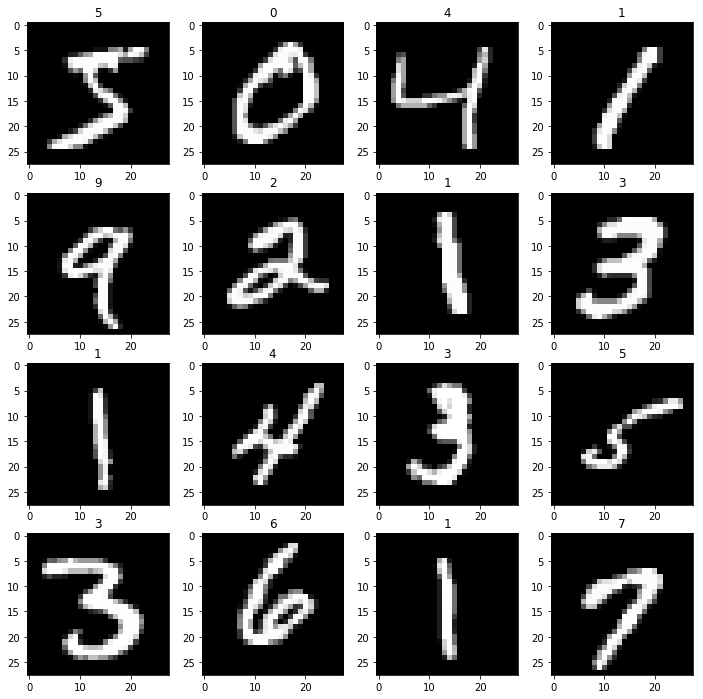

In [8]:
def show_samples(samples, labels):
    """
    display 16 samples and labels
    """
    plt.figure(figsize=(12, 12))
    for i in range(len(samples)):
        plt.subplot(4, 4, i+1)
        plt.imshow(samples[i], cmap='gray')
        plt.title(labels[i])
    plt.show()

show_samples(x_train[:16], y_train[:16])

In [9]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# 将样本归一化
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 784) (10000, 784)
(60000, 10) (10000, 10)


In [10]:
model = Sequential()
model.add(Dense(15, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
### print the keys contained in the history object
print(history.history.keys())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 11,935.0
Trainable params: 11,935
Non-trainable params: 0.0
_________________________________________________________________
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s - loss: 1.4034 - acc: 0.6037 - val_loss: 0.7985 - val_acc: 0.8130
Epoch 2/20
60000/60000 [==============================] - 0s - loss: 0.6558 - acc: 0.8416 - val_loss: 0.5290 - val_acc: 0.8649
Epoch 3/20
60000/60000 [==============================] - 0s - loss: 0.4986 - ac

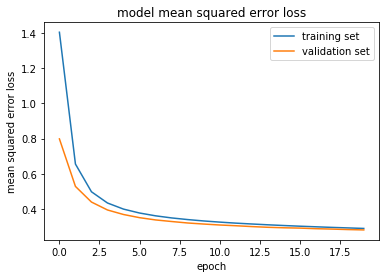

In [11]:
def plot_training(history):
    ### plot the training and validation loss for each epoch
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.show()

plot_training(history=history)

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2822907759845257
Test accuracy: 0.921


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s - loss: 0.2470 - ac

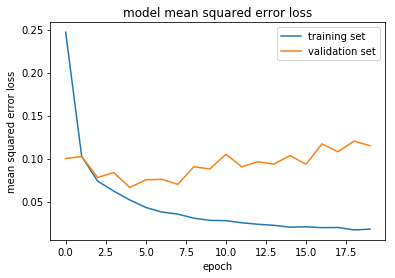

Test loss: 0.11488609814902762
Test accuracy: 0.9823


In [13]:
from keras.layers import Dropout
from keras.optimizers import RMSprop

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

### print the keys contained in the history object
print(history.history.keys())
plot_training(history=history)
model.save('model.json')

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [14]:
result = model.predict(x_test[:16])
result = np.argmax(result, 1)
print('predict: ', result)
true = np.argmax(y_test[:16], 1)
print('true: ', true)

predict:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5]
true:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5]


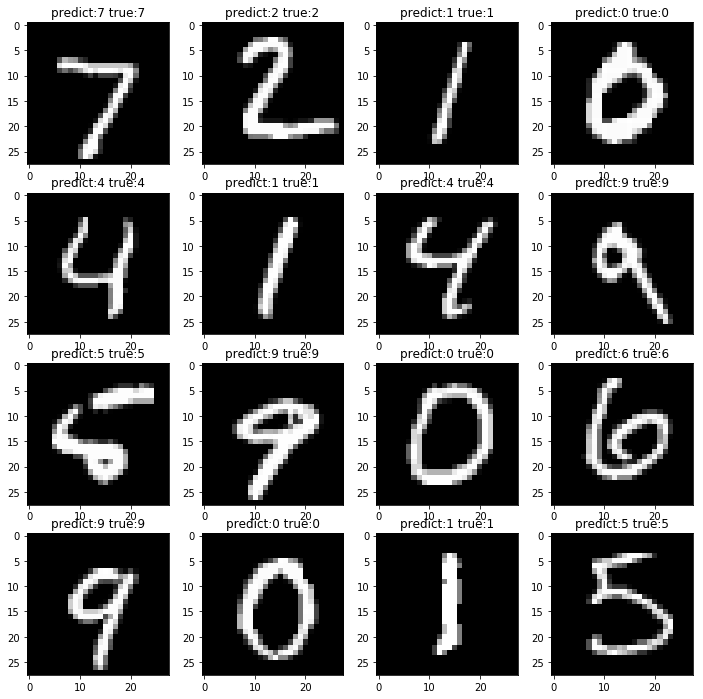

In [15]:
fig2 = plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[i].reshape((28, 28)), cmap='gray')
    plt.title('predict:'+str(result[i])+' true:'+str(true[i]))
plt.show()